In [71]:
import os
for dirname, _, filenames in os.walk('D:/OneDrive-QuangNgai/Cloud_Computing/Fruit_Vegetable_Recognition/dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

D:/OneDrive-QuangNgai/Cloud_Computing/Fruit_Vegetable_Recognition/dataset\test\apple\Image_1.jpg
D:/OneDrive-QuangNgai/Cloud_Computing/Fruit_Vegetable_Recognition/dataset\test\apple\Image_10.jpg
D:/OneDrive-QuangNgai/Cloud_Computing/Fruit_Vegetable_Recognition/dataset\test\apple\Image_2.jpg
D:/OneDrive-QuangNgai/Cloud_Computing/Fruit_Vegetable_Recognition/dataset\test\apple\Image_3.jpg
D:/OneDrive-QuangNgai/Cloud_Computing/Fruit_Vegetable_Recognition/dataset\test\apple\Image_4.jpg
D:/OneDrive-QuangNgai/Cloud_Computing/Fruit_Vegetable_Recognition/dataset\test\apple\Image_5.jpg
D:/OneDrive-QuangNgai/Cloud_Computing/Fruit_Vegetable_Recognition/dataset\test\apple\Image_6.JPG
D:/OneDrive-QuangNgai/Cloud_Computing/Fruit_Vegetable_Recognition/dataset\test\apple\Image_7.jpg
D:/OneDrive-QuangNgai/Cloud_Computing/Fruit_Vegetable_Recognition/dataset\test\apple\Image_8.jpg
D:/OneDrive-QuangNgai/Cloud_Computing/Fruit_Vegetable_Recognition/dataset\test\apple\Image_9.jpg
D:/OneDrive-QuangNgai/Cloud_C

In [82]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,img_to_array
print(tf.__version__)

2.15.0


In [101]:
def image_processing(filepath):
    """ Create a DataFrame with the filepath and the labels of the pictures
    """
    labels = [str(filepath[i]).split("\\")[-2] for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    df = pd.concat([filepath, labels], axis=1)

    # Shuffle the DataFrame and reset index
    df = df.sample(frac=1).reset_index(drop = True)
    
    return df

train_dir = Path('D:/OneDrive-QuangNgai/Cloud_Computing/Fruit_Vegetable_Recognition/dataset/train')
train_filepaths = list(train_dir.glob(r'**\*.jpg'))
test_dir = Path('D:/OneDrive-QuangNgai/Cloud_Computing/Fruit_Vegetable_Recognition/dataset/test')
test_filepaths = list(test_dir.glob(r'**\*.jpg'))
val_dir = Path('D:/OneDrive-QuangNgai/Cloud_Computing/Fruit_Vegetable_Recognition/dataset/validation')
val_filepaths = list(test_dir.glob(r'**\*.jpg'))

train_df = image_processing(train_filepaths)
test_df = image_processing(test_filepaths)
val_df = image_processing(val_filepaths)

print('-- Training set --\n')
print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

-- Training set --

Number of pictures: 2855

Number of different labels: 36

Labels: ['chilli pepper' 'lemon' 'kiwi' 'turnip' 'sweetcorn' 'eggplant'
 'sweetpotato' 'peas' 'cabbage' 'banana' 'cucumber' 'tomato' 'jalepeno'
 'soy beans' 'lettuce' 'potato' 'bell pepper' 'pineapple' 'onion' 'ginger'
 'apple' 'corn' 'paprika' 'capsicum' 'orange' 'spinach' 'garlic' 'grapes'
 'beetroot' 'pomegranate' 'watermelon' 'raddish' 'mango' 'carrot' 'pear'
 'cauliflower']


In [102]:
train_df.head(5)

,Filepath,Label
0,D:\OneDrive-QuangNgai\Cloud_Computing\Fruit_Ve...,chilli pepper
1,D:\OneDrive-QuangNgai\Cloud_Computing\Fruit_Ve...,lemon
2,D:\OneDrive-QuangNgai\Cloud_Computing\Fruit_Ve...,kiwi
3,D:\OneDrive-QuangNgai\Cloud_Computing\Fruit_Ve...,turnip
4,D:\OneDrive-QuangNgai\Cloud_Computing\Fruit_Ve...,sweetcorn


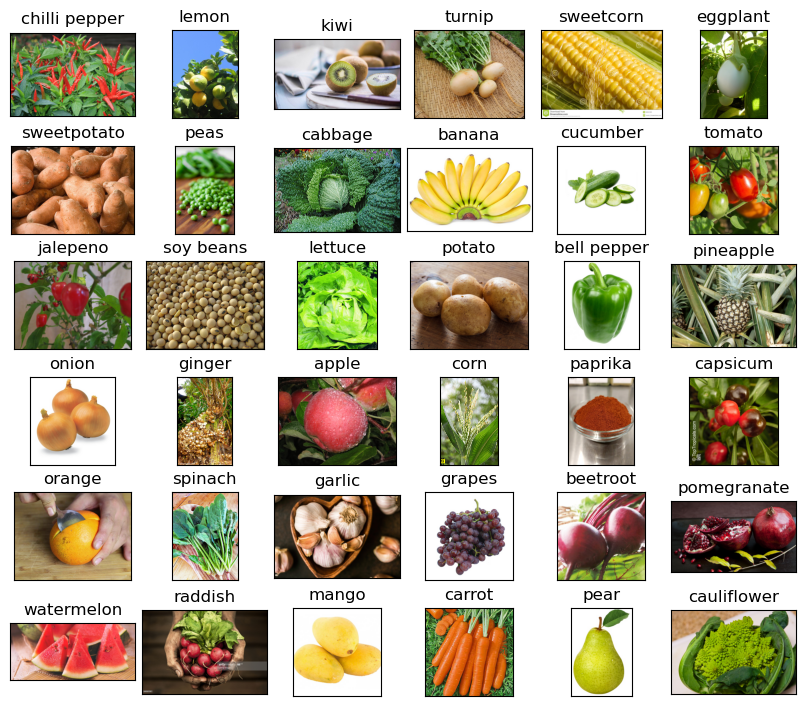

In [103]:
# Create a DataFrame with one Label of each category
df_unique = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()

# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(8, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

In [104]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 2855 validated image filenames belonging to 36 classes.


In [105]:
val_images = train_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 340 validated image filenames belonging to 36 classes.


In [106]:
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 340 validated image filenames belonging to 36 classes.


In [107]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False



9406464/9406464 [==============================] - 1s 0us/step


In [108]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(36, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    batch_size = 32,
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)


Epoch 1/5


90/90 [==============================] - 146s 2s/step - loss: 1.8085 - accuracy: 0.5236 - val_loss: 0.4584 - val_accuracy: 0.8500
Epoch 2/5
90/90 [==============================] - 121s 1s/step - loss: 0.5648 - accuracy: 0.8298 - val_loss: 0.3070 - val_accuracy: 0.9294
Epoch 3/5
90/90 [==============================] - 120s 1s/step - loss: 0.3466 - accuracy: 0.8816 - val_loss: 0.2394 - val_accuracy: 0.9412
Epoch 4/5
90/90 [==============================] - 120s 1s/step - loss: 0.2171 - accuracy: 0.9324 - val_loss: 0.1780 - val_accuracy: 0.9529
Epoch 5/5
90/90 [==============================] - 121s 1s/step - loss: 0.1429 - accuracy: 0.9573 - val_loss: 0.1556 - val_accuracy: 0.9529


In [109]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)
# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred1 = [labels[k] for k in pred]
pred1

11/11 [==============================] - 17s 1s/step


['tomato',
 'pomegranate',
 'peas',
 'banana',
 'garlic',
 'capsicum',
 'cabbage',
 'eggplant',
 'cabbage',
 'sweetcorn',
 'watermelon',
 'bell pepper',
 'bell pepper',
 'bell pepper',
 'onion',
 'pear',
 'chilli pepper',
 'spinach',
 'potato',
 'kiwi',
 'capsicum',
 'pear',
 'turnip',
 'mango',
 'garlic',
 'grapes',
 'cabbage',
 'lettuce',
 'raddish',
 'watermelon',
 'beetroot',
 'carrot',
 'turnip',
 'eggplant',
 'pomegranate',
 'pear',
 'jalepeno',
 'turnip',
 'eggplant',
 'cucumber',
 'tomato',
 'turnip',
 'garlic',
 'sweetcorn',
 'beetroot',
 'soy beans',
 'sweetpotato',
 'lemon',
 'cauliflower',
 'spinach',
 'sweetpotato',
 'spinach',
 'bell pepper',
 'kiwi',
 'apple',
 'lemon',
 'potato',
 'beetroot',
 'cauliflower',
 'pineapple',
 'pineapple',
 'onion',
 'watermelon',
 'soy beans',
 'bell pepper',
 'cauliflower',
 'grapes',
 'cabbage',
 'garlic',
 'apple',
 'carrot',
 'mango',
 'turnip',
 'pear',
 'mango',
 'watermelon',
 'soy beans',
 'onion',
 'cucumber',
 'beetroot',
 'mango

In [111]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = labels[y]
    return res

img = output('D:/OneDrive-QuangNgai/Cloud_Computing/Fruit_Vegetable_Recognition/dataset/test/banana/Image_1.jpg')
img

1/1 [==============================] - 0s 42ms/step


'banana'

In [112]:
model.save('FV.h5')

D:\Workspace\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
